# Part 0: Initial setup

In [ ]:
import torch
print('Version', torch.__version__)
print('CUDA enabled:', torch.cuda.is_available())

# Running this should then print out:
# Version 1.7.0+cu101 (or something like this)
# CUDA enabled: True

Version 1.13.0+cu116
CUDA enabled: False


# Part 1: Upload the dataset

First we upload the datasets. Here, the classification.zip contains data from the [Brain tumor classification](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) Kaggle dataset while the detection.zip contains data from the [Brain tumor detection](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection) Kaggle dataset.

We begin by importing the images first before standardizing the data's for cleaner model training.

In [ ]:
import os
DATA_PATH = '/content/'

os.chdir(DATA_PATH)
!wget https://homes.cs.washington.edu/~xuangela/classification.zip
!wget https://homes.cs.washington.edu/~xuangela/detection.zip
!apt-get install unzip
!unzip -o -q detection.zip
!unzip -o -q classification.zip
!rm detection.zip
!rm classification.zip

--2022-12-09 02:23:45--  https://homes.cs.washington.edu/~xuangela/classification.zip
Resolving homes.cs.washington.edu (homes.cs.washington.edu)... 128.208.3.226, 2607:4000:200:12::e2
Connecting to homes.cs.washington.edu (homes.cs.washington.edu)|128.208.3.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91002358 (87M) [application/zip]
Saving to: ‘classification.zip’

classification.zip  100%[===================>]  86.79M  44.6MB/s    in 1.9s    

2022-12-09 02:23:47 (44.6 MB/s) - ‘classification.zip’ saved [91002358/91002358]

--2022-12-09 02:23:47--  https://homes.cs.washington.edu/~xuangela/detection.zip
Resolving homes.cs.washington.edu (homes.cs.washington.edu)... 128.208.3.226, 2607:4000:200:12::e2
Connecting to homes.cs.washington.edu (homes.cs.washington.edu)|128.208.3.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7904894 (7.5M) [application/zip]
Saving to: ‘detection.zip’

detection.zip       100%[================

In [ ]:
# combine the datasets

import shutil

def organize_file():
    no_count = 0
    yes_count = 0

    # detection
    detection_no_path = DATA_PATH + "detection/no/"
    detection_yes_path = DATA_PATH + "detection/yes/"
    for path in os.listdir(detection_no_path):
        if os.path.isfile(os.path.join(detection_no_path, path)):
            before = detection_no_path + path
            after = DATA_PATH + "data/no" + str(no_count) + ".jpg"
            shutil.move(before, after)
            no_count += 1
    for path in os.listdir(detection_yes_path):
        if os.path.isfile(os.path.join(detection_yes_path, path)):
            before = detection_yes_path + path
            after = DATA_PATH + "data/yes" + str(yes_count) + ".jpg"
            shutil.move(before, after)
            yes_count += 1
    
    # classification
    no_count, yes_count = organize_classification_file(DATA_PATH + "Training", no_count, yes_count)
    no_count, yes_count = organize_classification_file(DATA_PATH + "Testing", no_count, yes_count)

def organize_classification_file(dir_path, no_count, yes_count):
    # generalize training/testing folder
    glioma_tumor_path = dir_path + "/glioma_tumor/"
    meningioma_tumor_path = dir_path + "/meningioma_tumor/"
    pituitary_tumor_path = dir_path + "/pituitary_tumor/"
    no_tumor_path = dir_path + "/no_tumor/"
    for path in os.listdir(glioma_tumor_path):
        if os.path.isfile(os.path.join(glioma_tumor_path, path)):
            before = glioma_tumor_path + path
            after = DATA_PATH + "data/yes" + str(yes_count) + ".jpg"
            shutil.move(before, after)
            yes_count += 1
    for path in os.listdir(meningioma_tumor_path):
        if os.path.isfile(os.path.join(meningioma_tumor_path, path)):
            before = meningioma_tumor_path + path
            after = DATA_PATH + "data/yes" + str(yes_count) + ".jpg"
            shutil.move(before, after)
            yes_count += 1
    for path in os.listdir(pituitary_tumor_path):
        if os.path.isfile(os.path.join(pituitary_tumor_path, path)):
            before = pituitary_tumor_path + path
            after = DATA_PATH + "data/yes" + str(yes_count) + ".jpg"
            shutil.move(before, after)
            yes_count += 1
    for path in os.listdir(no_tumor_path):
        if os.path.isfile(os.path.join(no_tumor_path, path)):
            before = no_tumor_path + path
            after = DATA_PATH + "data/no" + str(yes_count) + ".jpg"
            shutil.move(before, after)
            no_count += 1
    return no_count, yes_count

!mkdir data
organize_file()

In [ ]:
# clean up
os.chdir(DATA_PATH)
!rm -rf Testing
!rm -rf Training
!rm -rf detection

# Part 2: Split data into test and train

We go with a 80% train and 20% test split. We try to maintain a similar ratio of positive and negative diagnostic images in order to be to measure efficacy well. Otherwise, the division is random.

In [ ]:
DATA_PATH = '/content/data/'
os.chdir(DATA_PATH)

yes_count = 0
no_count = 0

for image_name in os.listdir(DATA_PATH):
    if os.path.isfile(image_name):
        if image_name.startswith("yes"):
            yes_count+= 1
        elif image_name.startswith("no"):
            no_count += 1
        else:
            print(image_name)

print("total number yes: "+ str(yes_count) + " total number no: " + str(no_count))

total number yes: 2919 total number no: 100


In [ ]:
DATA_PATH = '/content/'
os.chdir(DATA_PATH)
!mkdir train
!mkdir test

In [ ]:
import random
NUM_YES = 2919
NUM_NO = 100

yes_imgs = range(NUM_YES)
no_imgs = range(NUM_NO)
 
yes_train_count = int(.8 * NUM_YES)
no_train_count = int(.8 * NUM_NO)

train_yes_img = random.sample(yes_imgs, yes_train_count)
train_no_img = random.sample(no_imgs, no_train_count)

DATA_PATH = '/content/data/'
os.chdir(DATA_PATH)

TEST_PATH = '/content/test/'
TRAIN_PATH = '/content/train/'

for image_name in os.listdir(DATA_PATH):
    if os.path.isfile(image_name):
        if image_name.startswith("yes"):
            img_num = int(image_name[3:-4])

            if img_num in train_yes_img:
                target_path = TRAIN_PATH +image_name
            else:
                target_path = TEST_PATH +image_name
        elif image_name.startswith("no"):
            img_num = int(image_name[2:-4])

            if img_num in train_no_img:
                target_path = TRAIN_PATH +image_name
            else:
                target_path = TEST_PATH +image_name

        shutil.move(DATA_PATH + image_name, target_path)

!rm -rf data

# Part 3: Create the H5 files

We need to get the files (labels and the image data) for both the test dataset and the train dataset into a standardized format. We chose h5 since that's afile format we've worked with before on hw1

In [ ]:
# reference https://stackoverflow.com/questions/66631284/convert-a-folder-comprising-jpeg-images-to-hdf5

import sys
import glob
import h5py
import cv2

IMG_WIDTH = 256
IMG_HEIGHT = 256

def create_h5(file_name, data_path):
    os.chdir(data_path)
    nfiles = len(glob.glob('./*.jpg'))
    print(f'count of image files nfiles={nfiles}')

    # resize all images and load into a single dataset
    with h5py.File(file_name,'w') as  h5f:
        img_ds = h5f.create_dataset('images',shape=(nfiles, IMG_WIDTH, IMG_HEIGHT,3), dtype=int)
        labels_ds = h5f.create_dataset('labels', shape=(nfiles), dtype=bool)
        for cnt, ifile in enumerate(glob.iglob('./*.jpg')) :
            img = cv2.imread(ifile, cv2.IMREAD_COLOR)
            img_resize = cv2.resize( img, (IMG_WIDTH, IMG_HEIGHT) )
            img_ds[cnt:cnt+1:,:,:] = img_resize

            #label
            file_name = ifile[2:]
            if ifile[2:].startswith("y"):
                labels_ds[cnt] = True
            else:
                labels_ds[cnt] = False



data_path = '/content/test/'
file_path = '/content/test_images.h5'

create_h5(file_path, data_path)

data_path = '/content/train/'
file_path = '/content/rain_images.h5'

create_h5(file_path, data_path)

os.chdir('/content')
!rm -rf test
!rm -rf train

count of image files nfiles=606
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128
count of image files nfiles=128


# Part 4: Data augmentation

Now, we augment our data since our datasets are on the smaller side. This allows our model to train on a larger variety and breadth of information


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
import h5py
import sys

In [ ]:
# if train_images.h5 and test_images.h5 exist
import os
DATA_PATH = '/content/'
EPOCHS = 10

os.chdir(DATA_PATH)
!wget https://homes.cs.washington.edu/~xuangela/test_images.h5
!wget https://homes.cs.washington.edu/~xuangela/train_images.h5

--2022-12-11 08:48:13--  https://homes.cs.washington.edu/~xuangela/test_images.h5
Resolving homes.cs.washington.edu (homes.cs.washington.edu)... 128.208.3.226, 2607:4000:200:12::e2
Connecting to homes.cs.washington.edu (homes.cs.washington.edu)|128.208.3.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 953158238 (909M)
Saving to: ‘test_images.h5.1’

test_images.h5.1      0%[                    ]       0  --.-KB/s               ^C
--2022-12-11 08:48:14--  https://homes.cs.washington.edu/~xuangela/train_images.h5
Resolving homes.cs.washington.edu (homes.cs.washington.edu)... 128.208.3.226, 2607:4000:200:12::e2
Connecting to homes.cs.washington.edu (homes.cs.washington.edu)|128.208.3.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3795325293 (3.5G)
Saving to: ‘train_images.h5.1’

train_images.h5.1     2%[                    ] 105.79M  39.4MB/s               ^C


In [ ]:
import torch
import tensorflow as tf

# Data loader
class H5Dataset(torch.utils.data.Dataset):
    def __init__(self, h5_file, transform=None):
        self.transform = transform
        self.h5_file = h5py.File(h5_file, 'r')
        self.images = self.h5_file['images'][:]
        self.images = torch.tensor(self.images, dtype=torch.float)
        self.images = self.images.permute(0, 3, 1, 2)
        self.labels = self.h5_file['labels'][:]
        
    def __len__(self):
        return self.labels.shape[0]
      
    def __getitem__(self, idx):
        data = self.images[idx]
        label = self.labels[idx]
        if (self.labels[idx] == 0):
            label = torch.tensor([1, 0], dtype=torch.float)
        else:
            label = torch.tensor([0, 1], dtype=torch.float)

        if self.transform:
            data = self.transform(data)
        return (data, label)


In [ ]:
from torchvision import transforms
DATA_PATH = '/content/'

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.1),
    transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([
    ])

# using test dataset for train for now
data_test = H5Dataset(DATA_PATH + 'test_images.h5')
print(len(data_test))
data_train = H5Dataset(DATA_PATH + 'train_images.h5')
print(len(data_train))

606
2413


# Part 5: Training our model


In [ ]:
import torch
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt


def plot(x_values, y_values, title, xlabel, ylabel):
    """Plots a line graph

    Args:
        x_values(list or np.array): x values for the line
        y_values(list or np.array): y values for the line
        title(str): Title for the plot
        xlabel(str): Label for the x axis
        ylabel(str): label for the y axis
    """

    plt.figure(figsize=(20, 10))
    plt.plot(x_values, y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
import time
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    losses = []
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, label)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
    return np.mean(losses)

def test(model, device, test_loader, return_images=False, logging=True):
    model.eval()
    test_loss = 0
    correct = 0

    correct_images = []
    correct_values = []

    error_images = []
    predicted_values = []
    gt_values = []
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(test_loader):
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss_on = model.loss(output, label, reduction='sum').item()
            test_loss += test_loss_on
            pred = output.max(1)[1]
            correct_labels = label.max(1)[1]
            correct_mask = pred.eq(correct_labels)
            num_correct = correct_mask.sum().item()
            correct += num_correct
            if return_images:
                if num_correct > 0:
                    correct_images.append(data[correct_mask, ...].data.cpu().numpy())
                    correct_value_data = label[correct_mask].data.cpu().numpy()
                    correct_values.append(correct_value_data)
                if num_correct < len(label):
                    error_data = data[~correct_mask, ...].data.cpu().numpy()
                    error_images.append(error_data)
                    predicted_value_data = pred[~correct_mask].data.cpu().numpy()
                    predicted_values.append(predicted_value_data)
                    gt_value_data = label[~correct_mask].data.cpu().numpy()
                    gt_values.append(gt_value_data)
    if return_images:
        correct_images = np.concatenate(correct_images, axis=0)
        error_images = np.concatenate(error_images, axis=0)
        predicted_values = np.concatenate(predicted_values, axis=0)
        correct_values = np.concatenate(correct_values, axis=0)
        gt_values = np.concatenate(gt_values, axis=0)

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest loss: {:.4f}, Test accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    if return_images:
        return test_loss, test_accuracy, correct_images, correct_values, error_images, predicted_values, gt_values
    else:
        return test_loss, test_accuracy


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
import multiprocessing

# Play around with these constants, you may find a better setting.
def test_model(model, batchSize, testBatchSize, epochs, learningRate, momentum, weightDecay, logging=True):
    kwargs = {'num_workers': multiprocessing.cpu_count(),
            'pin_memory': True} if use_cuda else {}

    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batchSize,
                                            shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(data_test, batch_size=testBatchSize,
                                            shuffle=False, **kwargs)

    optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=momentum, weight_decay=weightDecay)

    train_losses = []
    test_losses = []
    test_accuracies = []

    test_loss, test_accuracy = test(model, device, test_loader, False, logging)
    test_losses.append((0, test_loss))
    test_accuracies.append((0, test_accuracy))

    for epoch in range(epochs):
        train_loss = train(model, device, train_loader, optimizer, epoch)

        print("Epoch: {}\n Train loss: {:.4f}".format(epoch, train_loss))

        test_loss, test_accuracy = test(model, device, test_loader, False, True)
        train_losses.append((epoch, train_loss))
        test_losses.append((epoch, test_loss))
        test_accuracies.append((epoch, test_accuracy))

    return train_losses, test_losses, test_accuracies

# model = ComplexNet().to(device)
# train_losses, test_losses, test_accuracies = test_model(model, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0005, logging=False)

# Part 6: Defining our networ



In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1, bias=False)
    self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
    self.maxpool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(4096, 2)
    
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    return x

  def loss(self, prediction, label, reduction='mean'):
    loss = nn.BCEWithLogitsLoss(reduction=reduction)
    loss_val = loss(prediction.squeeze(), label.squeeze())
    return loss_val

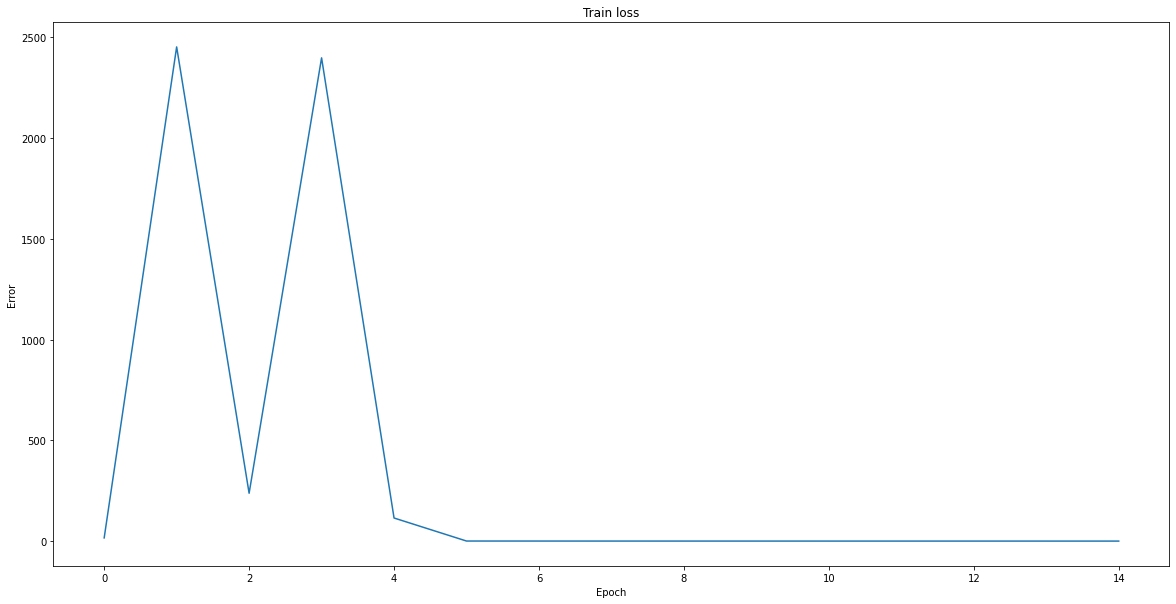

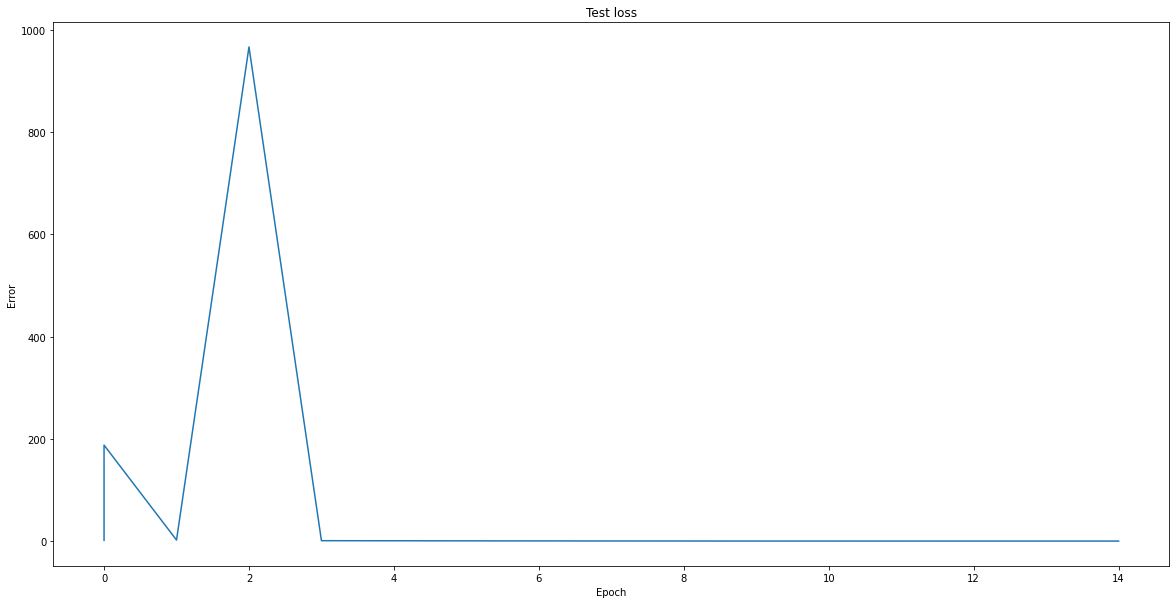

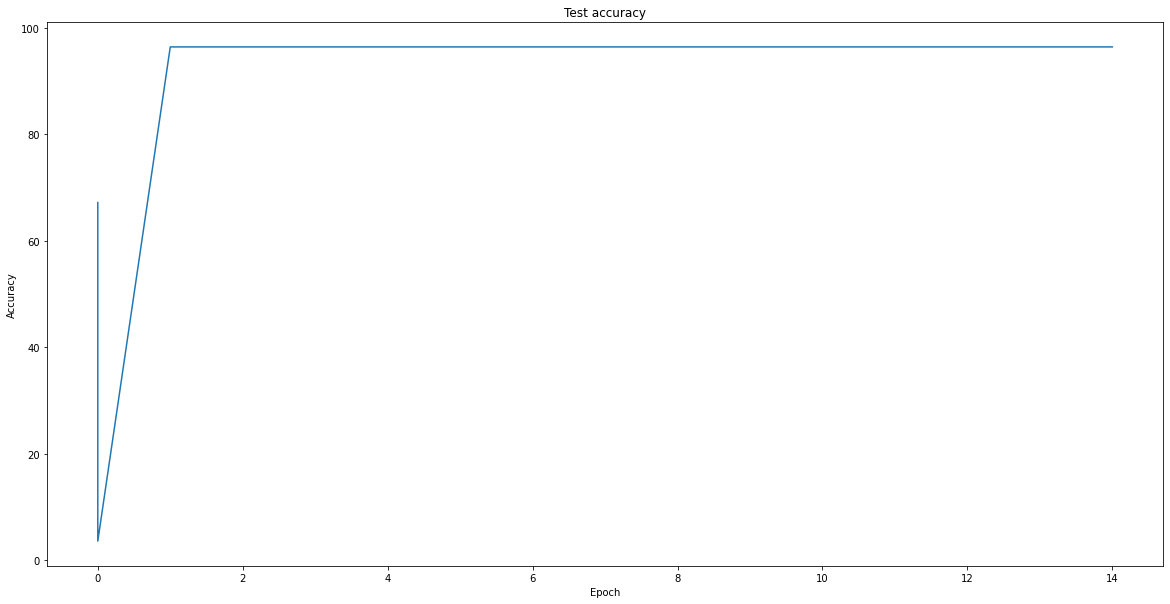

In [ ]:
ep, val = zip(*train_losses)
plot(ep, val, 'Train loss', 'Epoch', 'Error')
ep, val = zip(*test_losses)
plot(ep, val, 'Test loss', 'Epoch', 'Error')
ep, val = zip(*test_accuracies)
plot(ep, val, 'Test accuracy', 'Epoch', 'Accuracy')

In [ ]:
class ComplexNet(nn.Module):
  def __init__(self):
    super(ComplexNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, stride=2, padding=1, bias=False)
    self.conv2 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(256, 512, 3, stride=2, padding=1)
    self.maxpool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(8192, 2)
    
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    return x

  def loss(self, prediction, label, reduction='mean'):
    loss = nn.BCEWithLogitsLoss(reduction=reduction)
    loss_val = loss(prediction.squeeze(), label.squeeze())
    return loss_val

In [ ]:
class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1, bias=False)
    self.maxpool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(262144, 2)
    
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    return x

  def loss(self, prediction, label, reduction='mean'):
    loss = nn.BCEWithLogitsLoss(reduction=reduction)
    loss_val = loss(prediction.squeeze(), label.squeeze())
    return loss_val

#Part 7: Parameter experimentation

In [ ]:
lrs = [0.01, 0.005, 0.001]
moms = [0.95, 0.9, 0.85]
weights = [0.0005, 0.0010, 0.0015]

model1 = ConvNet().to(device)
train_losses1, test_losses1, test_accuracies1 = test_model(model1, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0005, logging=False)
model2 = ConvNet().to(device)
train_losses2, test_losses2, test_accuracies2 = test_model(model2, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.005, momentum=0.95, weightDecay=0.0005, logging=False)
model3 = ConvNet().to(device)
train_losses3, test_losses3, test_accuracies3 = test_model(model3, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.001, momentum=0.95, weightDecay=0.0005, logging=False)


Test loss: 0.6308, Test accuracy: 584/606 (96%)

Epoch: 0
 Train loss: 2.7996

Test loss: 0.5969, Test accuracy: 584/606 (96%)

Epoch: 1
 Train loss: 0.6174

Test loss: 0.7715, Test accuracy: 584/606 (96%)

Epoch: 2
 Train loss: 33.9474

Test loss: 0.9831, Test accuracy: 584/606 (96%)

Epoch: 3
 Train loss: 0.2780

Test loss: 0.7058, Test accuracy: 584/606 (96%)

Epoch: 4
 Train loss: 0.2343

Test loss: 0.3657, Test accuracy: 583/606 (96%)

Epoch: 5
 Train loss: 0.1621

Test loss: 0.3209, Test accuracy: 584/606 (96%)

Epoch: 6
 Train loss: 0.1409

Test loss: 0.3020, Test accuracy: 582/606 (96%)

Epoch: 7
 Train loss: 0.1377

Test loss: 0.3076, Test accuracy: 581/606 (96%)

Epoch: 8
 Train loss: 0.1342

Test loss: 0.3249, Test accuracy: 581/606 (96%)

Epoch: 9
 Train loss: 0.1386

Test loss: 0.3011, Test accuracy: 585/606 (97%)

Epoch: 10
 Train loss: 0.1376

Test loss: 0.2966, Test accuracy: 585/606 (97%)

Epoch: 11
 Train loss: 0.1353

Test loss: 0.2963, Test accuracy: 585/606 (97%)


TypeError: ignored

<Figure size 1440x720 with 0 Axes>

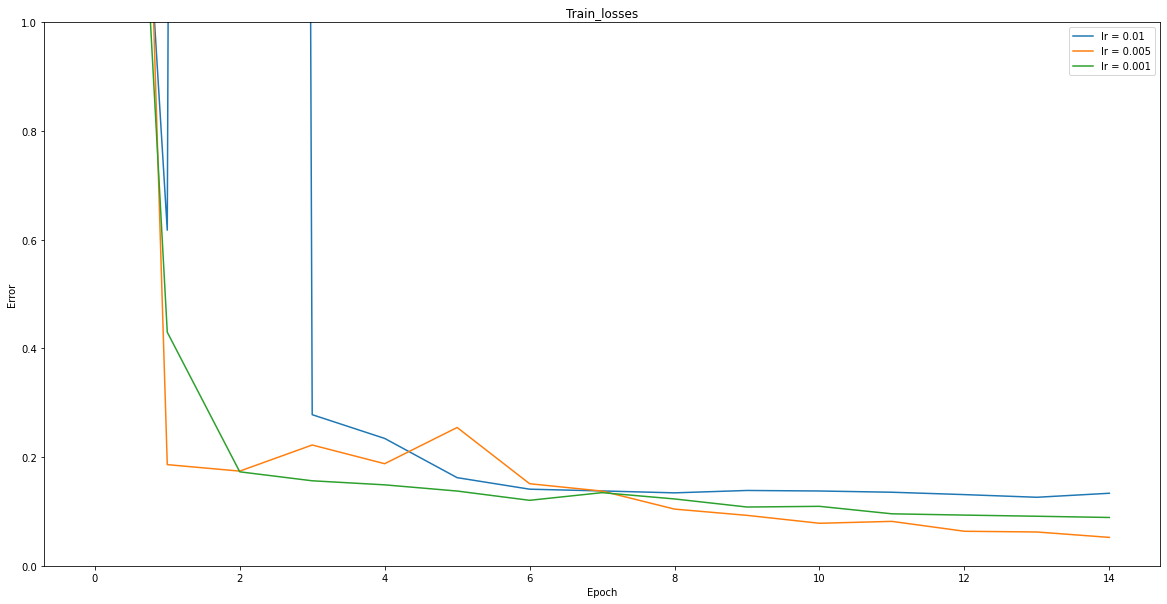

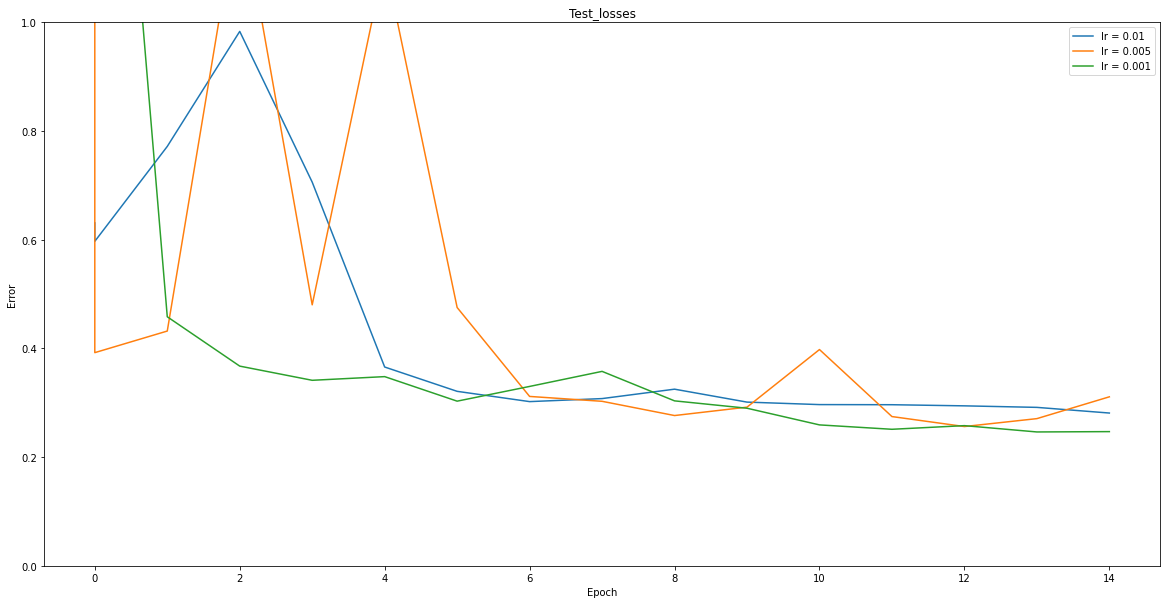

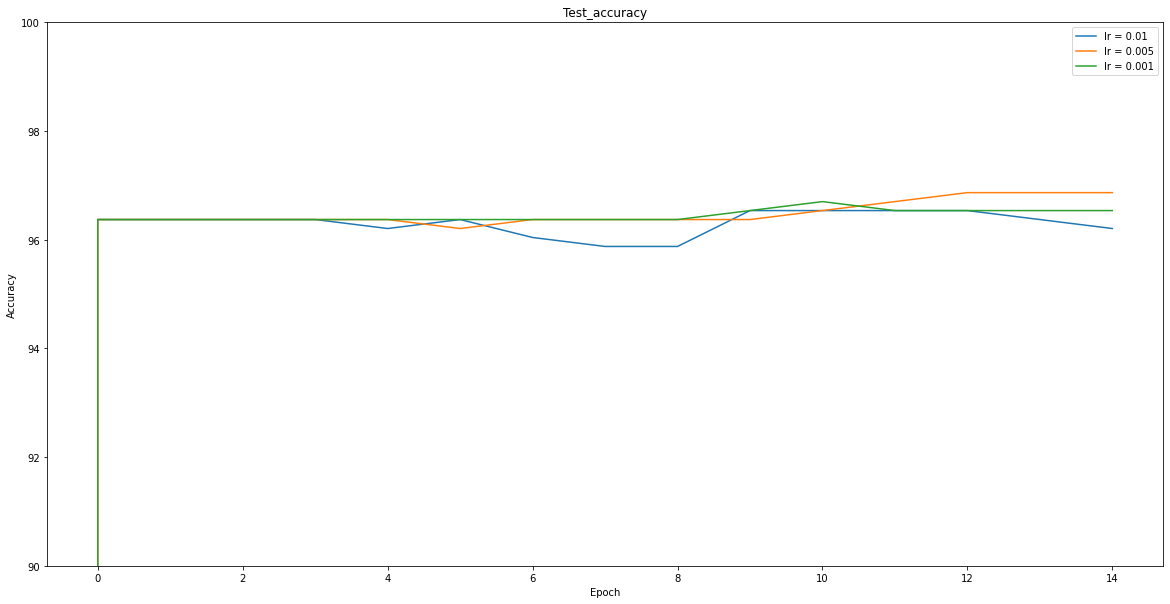

In [ ]:
# train loss
plt.figure(figsize=(20, 10))
ep, val = zip(*train_losses1)
plt.plot(ep, val, label = "lr = 0.01")
ep, val = zip(*train_losses2)
plt.plot(ep, val, label = "lr = 0.005")
ep, val = zip(*train_losses3)
plt.plot(ep, val, label = "lr = 0.001")
plt.title('Train_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()


# test loss
plt.figure(figsize=(20, 10))
ep, val = zip(*test_losses1)
plt.plot(ep, val, label = "lr = 0.01")
ep, val = zip(*test_losses2)
plt.plot(ep, val, label = "lr = 0.005")
ep, val = zip(*test_losses3)
plt.plot(ep, val, label = "lr = 0.001")
plt.title('Test_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()

# test accuracy
plt.figure(figsize=(20, 10))
ep, val = zip(*test_accuracies1)
plt.plot(ep, val, label = "lr = 0.01")
ep, val = zip(*test_accuracies2)
plt.plot(ep, val, label = "lr = 0.005")
ep, val = zip(*test_accuracies3)
plt.plot(ep, val, label = "lr = 0.001")
plt.title('Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(90, 100)
plt.show()


In [ ]:
# momentum exp 

lrs = [0.01, 0.005, 0.001]
moms = [0.95, 0.9, 0.85]
weights = [0.0005, 0.0010, 0.0015]

model1 = ConvNet().to(device)
train_losses1, test_losses1, test_accuracies1 = test_model(model1, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0005, logging=False)
model2 = ConvNet().to(device)
train_losses2, test_losses2, test_accuracies2 = test_model(model2, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.85, weightDecay=0.0005, logging=False)
model3 = ConvNet().to(device)
train_losses3, test_losses3, test_accuracies3 = test_model(model3, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.9, weightDecay=0.0005, logging=False)

# train loss
plt.figure(figsize=(20, 10))
ep, val = zip(*test_losses1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*train_losses2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*train_losses3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Train_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()

# test loss
plt.figure(figsize=(20, 10))
ep, val = zip(*test_losses1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*test_losses2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*test_losses3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Test_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()

# test accuracy
plt.figure(figsize=(20, 10))
ep, val = zip(*test_accuracies1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*test_accuracies2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*test_accuracies3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(90, 100)
plt.show()

In [ ]:
# momentum exp 

lrs = [0.01, 0.005, 0.001]
moms = [0.95, 0.9, 0.85]
weights = [0.0005, 0.0010, 0.0015]

model1 = ConvNet().to(device)
train_losses1, test_losses1, test_accuracies1 = test_model(model1, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0005, logging=False)
model2 = ConvNet().to(device)
train_losses2, test_losses2, test_accuracies2 = test_model(model2, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0010, logging=False)
model3 = ConvNet().to(device)
train_losses3, test_losses3, test_accuracies3 = test_model(model3, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.01, momentum=0.95, weightDecay=0.0015, logging=False)

# train loss
plt.figure(figsize=(20, 10))
ep, val = zip(*test_losses1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*train_losses2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*train_losses3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Train_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()

# test loss
plt.figure(figsize=(20, 10))
ep, val = zip(*test_losses1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*test_losses2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*test_losses3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Test_losses')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.show()

# test accuracy
plt.figure(figsize=(20, 10))
ep, val = zip(*test_accuracies1)
plt.plot(ep, val,  label = "weightDecay=0.0005")
ep, val = zip(*test_accuracies2)
plt.plot(ep, val, label = "weightDecay=0.0010")
ep, val = zip(*test_accuracies3)
plt.plot(ep, val, label = "weightDecay=0.0015")
plt.title('Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(90, 100)
plt.show()

# Part 8: Saving our best model

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
import multiprocessing

# Play around with these constants, you may find a better setting.
def test_model(model, batchSize, testBatchSize, epochs, learningRate, momentum, weightDecay, logging=True):
    kwargs = {'num_workers': multiprocessing.cpu_count(),
            'pin_memory': True} if use_cuda else {}

    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batchSize,
                                            shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(data_test, batch_size=testBatchSize,
                                            shuffle=False, **kwargs)

    optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=momentum, weight_decay=weightDecay)

    train_losses = []
    test_losses = []
    test_accuracies = []

    test_loss, test_accuracy = test(model, device, test_loader, False, logging)
    test_losses.append((0, test_loss))
    test_accuracies.append((0, test_accuracy))

    for epoch in range(epochs):
        train_loss = train(model, device, train_loader, optimizer, epoch)

        print("Epoch: {}\n Train loss: {:.4f}".format(epoch, train_loss))

        test_loss, test_accuracy = test(model, device, test_loader, False, True)
        # model.save_best_model(test_accuracy, '/content/checkpoints/%03d.pt' % epoch)
        train_losses.append((epoch, train_loss))
        test_losses.append((epoch, test_loss))
        test_accuracies.append((epoch, test_accuracy))
        

    return train_losses, test_losses, test_accuracies

model = ConvNet().to(device)
train_losses, test_losses, test_accuracies = test_model(model, batchSize=256, testBatchSize=10, epochs=15, learningRate=0.005, momentum=0.85, weightDecay=0.0005, logging=False)


Test loss: 3.8825, Test accuracy: 75/606 (12%)

Epoch: 0
 Train loss: 4.1072

Test loss: 0.4218, Test accuracy: 584/606 (96%)

Epoch: 1
 Train loss: 0.1901

Test loss: 0.3702, Test accuracy: 584/606 (96%)

Epoch: 2
 Train loss: 0.1600

Test loss: 0.3398, Test accuracy: 584/606 (96%)

Epoch: 3
 Train loss: 0.1430

Test loss: 0.3182, Test accuracy: 584/606 (96%)

Epoch: 4
 Train loss: 0.1300

Test loss: 0.3420, Test accuracy: 584/606 (96%)

Epoch: 5
 Train loss: 0.1226

Test loss: 0.2801, Test accuracy: 584/606 (96%)

Epoch: 6
 Train loss: 0.0974

Test loss: 0.3713, Test accuracy: 584/606 (96%)

Epoch: 7
 Train loss: 0.1086

Test loss: 0.2668, Test accuracy: 585/606 (97%)

Epoch: 8
 Train loss: 0.0955

Test loss: 0.2400, Test accuracy: 587/606 (97%)

Epoch: 9
 Train loss: 0.0905

Test loss: 0.3032, Test accuracy: 586/606 (97%)

Epoch: 10
 Train loss: 0.0799

Test loss: 0.2316, Test accuracy: 586/606 (97%)

Epoch: 11
 Train loss: 0.0645

Test loss: 0.2617, Test accuracy: 587/606 (97%)

E

In [ ]:
def save(net, file_name='', num_to_keep=1):
    """Saves the net to file, creating folder paths if necessary.

    Args:
        net(torch.nn.module): The network to save
        file_name(str): the path to save the file.
        num_to_keep(int): Specifies how many previous saved states to keep once this one has been saved.
            Defaults to 1. Specifying < 0 will not remove any previous saves.
    """

    folder = os.path.dirname(file_name)
    if not os.path.exists(folder):
        os.makedirs(folder)
    torch.save(net.state_dict(), file_name)
    extension = os.path.splitext(file_name)[1]
    checkpoints = sorted(glob.glob(folder + '/*' + extension), key=os.path.getmtime)
    print('Saved %s\n' % file_name)
    if num_to_keep > 0:
        for ff in checkpoints[:-num_to_keep]:
            os.remove(ff)

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1, bias=False)
    self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
    self.maxpool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(4096, 2)

    self.best_accuracy = -1
    
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = self.maxpool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    return x

  def loss(self, prediction, label, reduction='mean'):
    loss = nn.BCEWithLogitsLoss(reduction=reduction)
    loss_val = loss(prediction.squeeze(), label.squeeze())
    return loss_val

  def save_model(self, file_path, num_to_keep=1):
    save(self, file_path, num_to_keep)

    # Saves the best model so far
  def save_best_model(self, accuracy, file_path, num_to_keep=1):
    if accuracy > self.best_accuracy:
      self.save_model(file_path, num_to_keep)
      self.best_accuracy = accuracy

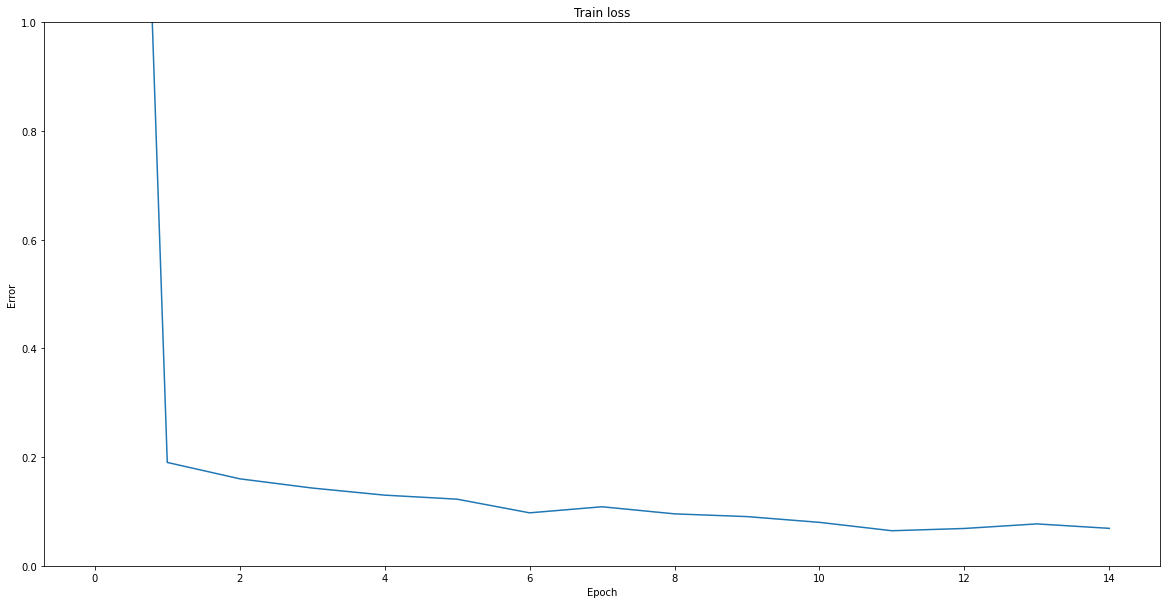

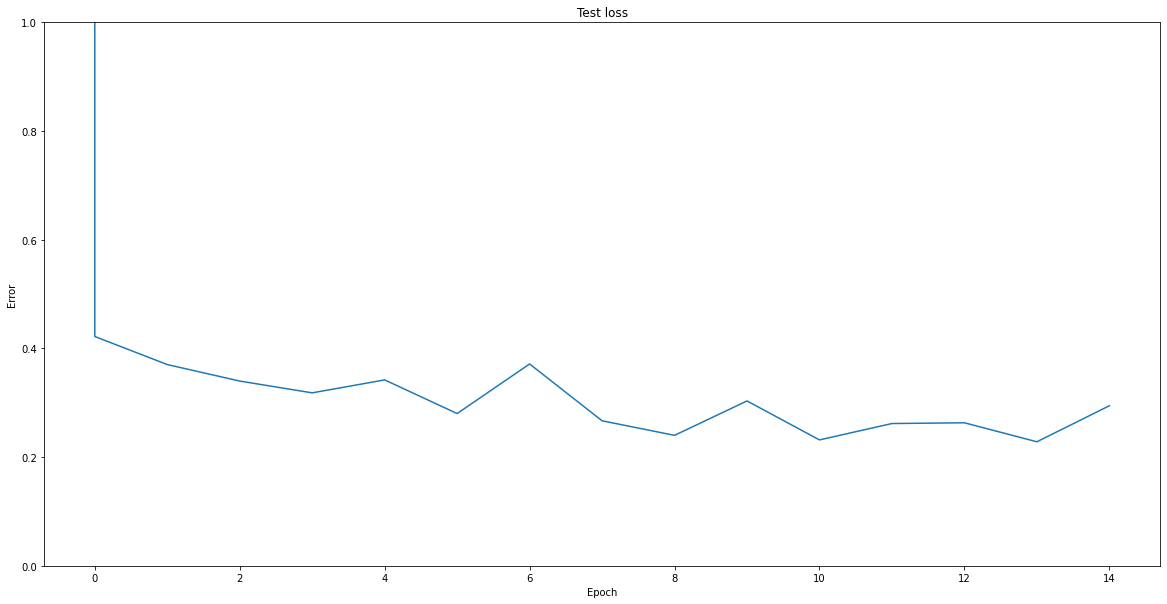

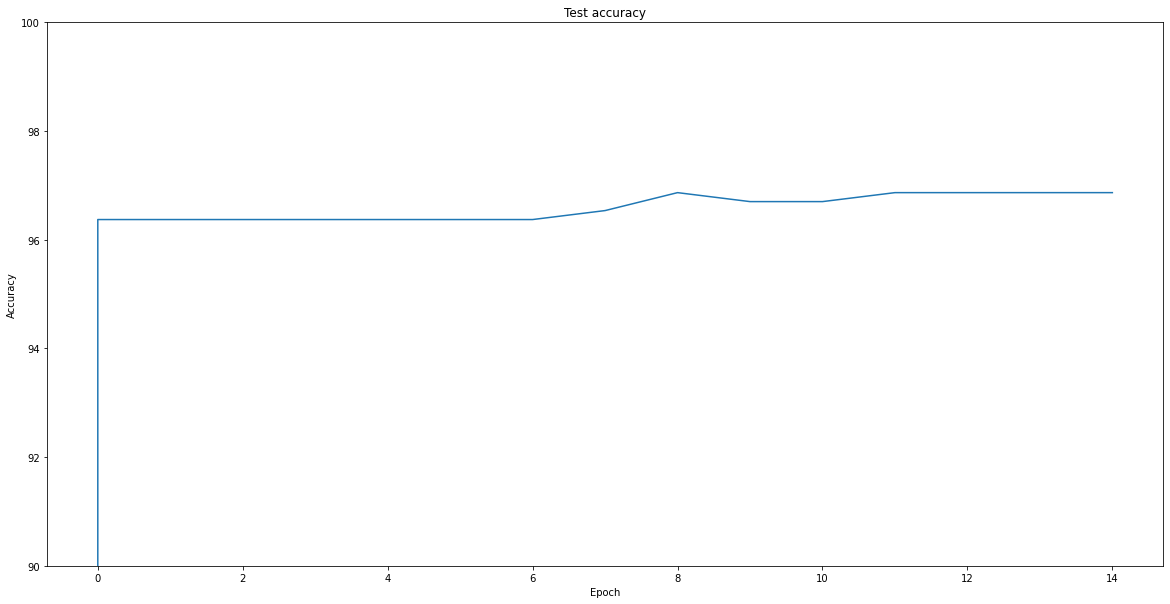

In [ ]:


ep, val = zip(*train_losses)
plt.figure(figsize=(20, 10))
plt.plot(ep, val)
plt.title('Train loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.show()
    
ep, val = zip(*test_losses)
plt.figure(figsize=(20, 10))
plt.plot(ep, val)
plt.title('Test loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.show()

ep, val = zip(*test_accuracies)
plt.figure(figsize=(20, 10))
plt.plot(ep, val)
plt.title('Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(90, 100)
plt.show()